# Assignment: Chustomer-Churn Dataset Analysis and Model Building

## Name: Umair Farooq
## RegNo: L1F22BSCS1105

In [1]:
import pandas as pd

# Load The DataSet

In [2]:
df = pd.read_csv("Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges']=df['TotalCharges'].astype('float')
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace = True)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### we don't need these column(customerID gender SeniorCitizen Partner Dependents tenure)) for data training and testing of dataset.

In [9]:

df.drop(columns=['customerID', 'SeniorCitizen' ,'Partner' ,'Dependents' ,'tenure' ],inplace  = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   PhoneService      7043 non-null   object 
 2   MultipleLines     7043 non-null   object 
 3   InternetService   7043 non-null   object 
 4   OnlineSecurity    7043 non-null   object 
 5   OnlineBackup      7043 non-null   object 
 6   DeviceProtection  7043 non-null   object 
 7   TechSupport       7043 non-null   object 
 8   StreamingTV       7043 non-null   object 
 9   StreamingMovies   7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), object(14)
memory usage: 88

                MonthlyCharges  TotalCharges
MonthlyCharges        1.000000      0.651174
TotalCharges          0.651174      1.000000


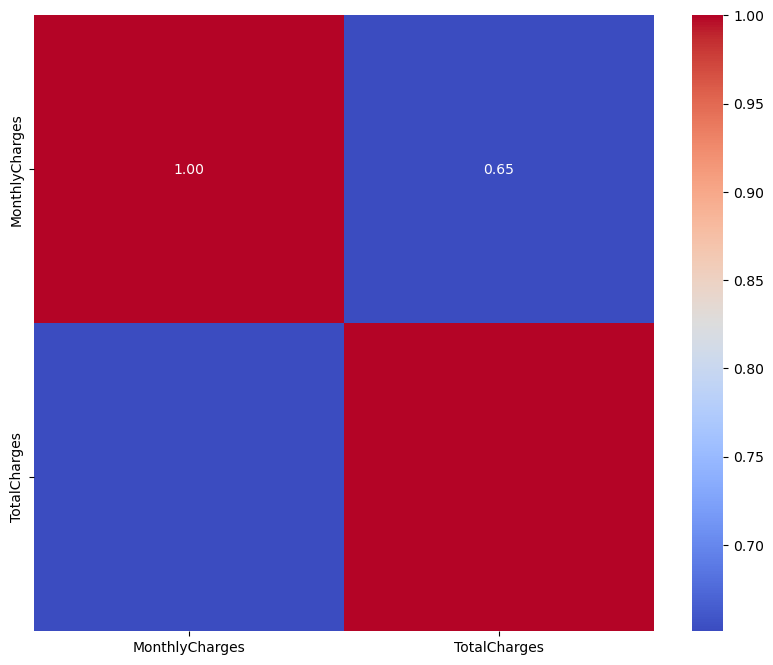

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


## Encoding Categorical Variables

In [12]:
from sklearn.preprocessing import LabelEncoder
column_to_encode = ['PhoneService','gender'	,'MultipleLines','Contract','PaperlessBilling'	,'PaymentMethod','InternetService','OnlineSecurity','OnlineBackup',	'DeviceProtection'	,'TechSupport',	'StreamingTV'	,'StreamingMovies']
df_encoded = df.copy()
for col in column_to_encode:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   PhoneService      7043 non-null   int32  
 2   MultipleLines     7043 non-null   int32  
 3   InternetService   7043 non-null   int32  
 4   OnlineSecurity    7043 non-null   int32  
 5   OnlineBackup      7043 non-null   int32  
 6   DeviceProtection  7043 non-null   int32  
 7   TechSupport       7043 non-null   int32  
 8   StreamingTV       7043 non-null   int32  
 9   StreamingMovies   7043 non-null   int32  
 10  Contract          7043 non-null   int32  
 11  PaperlessBilling  7043 non-null   int32  
 12  PaymentMethod     7043 non-null   int32  
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int32(13), object(1)
memory

In [13]:
df_encoded.head() 

,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


## Standardization and Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
df_standard_scale = df_encoded.copy()

df_standard_scale['MonthlyCharges'] = scaler_standard.fit_transform(df_standard_scale.MonthlyCharges.values.reshape(-1,1))
df_standard_scale['TotalCharges'] = scaler_standard.fit_transform(df_standard_scale.TotalCharges.values.reshape(-1,1))

In [15]:
df_standard_scale.drop(columns = ['OnlineBackup','StreamingMovies','TechSupport'],inplace=True)
df_standard_scale.head(10)


,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,0,0,1,2,-1.160323,-0.992611,No
1,1,1,0,0,2,2,0,1,0,3,-0.259629,-0.172165,No
2,1,1,0,0,2,0,0,0,1,3,-0.362660,-0.958066,Yes
3,1,0,1,0,2,2,0,1,0,0,-0.746535,-0.193672,No
4,0,1,0,1,0,0,0,0,1,2,0.197365,-0.938874,Yes
5,0,1,2,1,0,2,2,0,1,2,1.159546,-0.643789,Yes
6,1,1,2,1,0,0,2,0,1,1,0.808907,-0.145738,No
7,0,0,1,0,2,0,0,0,0,3,-1.163647,-0.872587,No
8,0,1,2,1,0,2,2,0,1,2,1.330711,0.338085,Yes
9,1,1,0,0,2,0,0,1,0,0,-0.286218,0.533044,No


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
df_MinMax_scal = df_encoded.copy()
df_MinMax_scal['MonthlyCharges'] = scaler_minmax.fit_transform(df_MinMax_scal.MonthlyCharges.values.reshape(-1,1))
df_MinMax_scal['TotalCharges'] = scaler_minmax.fit_transform(df_MinMax_scal.TotalCharges.values.reshape(-1,1))

In [17]:
df_MinMax_scal.head()

,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,No
1,1,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,No
2,1,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,Yes
3,1,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,No
4,0,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,Yes


## Splitting the Dataset
### drop certain columns after testing them again and again

In [18]:
df_MinMax_scal.drop(columns = ['PaymentMethod','StreamingMovies','InternetService','OnlineSecurity','StreamingTV','MultipleLines','Contract','TechSupport','OnlineBackup'], inplace=True)
X = df_MinMax_scal.iloc[:, :-1].values
y = df_MinMax_scal.iloc[:, -1].values


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## Model Building and Evaluation

### knn

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5)   
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.78
              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1036
         Yes       0.61      0.52      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [21]:
knn_cm = confusion_matrix(y_test, y_pred)


### Svm

In [31]:
X = df_standard_scale.iloc[:, :-1].values
y = df_standard_scale.iloc[:, -1].values
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm = SVC(kernel ='rbf', random_state = 0)  
 

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy:.2f}")

#print(classification_report(y_test, y_pred))
custom_input ={'gender': 1, 'PhoneService': 1, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 1, 'DeviceProtection': 0, 'StreamingTV': 0, 'Contract': 0, 'PaperlessBilling': 1, 'PaymentMethod': 3, 'MonthlyCharges': 53.85, 'TotalCharges': 108.15}
custom_df = pd.DataFrame([custom_input])
custom_df_encoded = pd.get_dummies(custom_df, drop_first=True)

#y_pred = svm.predict(custom_df_encoded.values)
custom_df_encoded

,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,1,0,0,1,0,0,0,1,3,53.85,108.15


In [32]:
df_enc = df_encoded.copy()
df_enc.drop(columns=['OnlineBackup', 'StreamingMovies', 'TechSupport'], inplace=True)
custom_df_encoded = pd.get_dummies(custom_df, drop_first=True)
custom_df_encoded = custom_df_encoded.reindex(columns=df_enc.columns[:-1], fill_value=0)

# Standardize 'MonthlyCharges' and 'TotalCharges' for custom input using the same scaler
custom_df_encoded['MonthlyCharges'] = scaler_standard.transform(custom_df_encoded[['MonthlyCharges']])
custom_df_encoded['TotalCharges'] = scaler_standard.transform(custom_df_encoded[['TotalCharges']])
custom_df_encoded
y_pred = svm.predict(custom_df_encoded.values)
y_pred[0]

C:\Users\umair\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\umair\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


'No'

### RF

In [39]:

X = df_standard_scale.iloc[:, :-1].values
y = df_standard_scale.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=100, random_state=42)   
 
rf.fit(X_train, y_train)
 
y_pred = rf.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
 
print(classification_report(y_test, y_pred))


Accuracy: 0.79
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [25]:
rf_cm = confusion_matrix(y_test, y_pred)


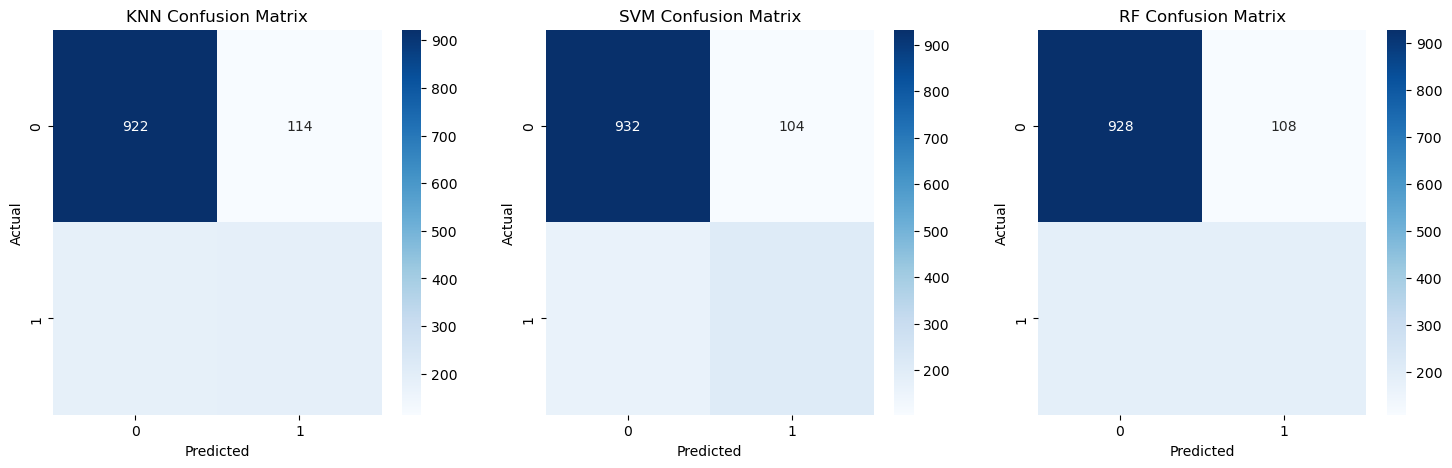

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(knn_cm, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('KNN Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(svm_cm, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('SVM Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(rf_cm, annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('RF Confusion Matrix')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')
plt.show()

#### BY using three algorithm svm is more accurate with 0.81 of prediction 